# How Do Global Events Affect The Price of Gold, and Oil?

In this project, we will analyze the price of Gold and Oil in the US stock market from 2018 to 2024. We want to see if fluctuations in the price of gold and oil are related to global events.  
To study the behaviour of the price of oil and gold, we will use the [US Stock Market Dataset](https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data) from Kaggle. The dataset contain information on the price of stocks, crypto, metals, and energy markets from 2019 to 2024. We are only interested in the price of gold and oil.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Getting the data

In [2]:
price_data = pd.read_csv("data/Stock Market Dataset.csv", index_col=0)[['Date', 'Crude_oil_Price', 'Gold_Price']]
price_data.head()

,Date,Crude_oil_Price,Gold_Price
0,02-02-2024,72.28,"2,053.70"
1,01-02-2024,73.82,"2,071.10"
2,31-01-2024,75.85,"2,067.40"
3,30-01-2024,77.82,"2,050.90"
4,29-01-2024,76.78,"2,034.90"


In [3]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1242
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1243 non-null   object 
 1   Crude_oil_Price  1243 non-null   float64
 2   Gold_Price       1243 non-null   object 
dtypes: float64(1), object(2)
memory usage: 38.8+ KB


In [4]:
# transform gold price to float
price_data['Gold_Price'] = price_data['Gold_Price'].str.replace(',', '').astype(float)
price_data.describe(include='all')

,Date,Crude_oil_Price,Gold_Price
count,1243,1243.000000,1243.000000
unique,1243,NaN,NaN
top,02-02-2024,NaN,NaN
freq,1,NaN,NaN
mean,NaN,67.577064,1759.246742
std,NaN,20.465500,203.258901
min,NaN,-37.630000,1272.000000
25%,NaN,55.095000,1669.600000
50%,NaN,69.230000,1804.200000
75%,NaN,80.455000,1912.800000


In [5]:
#Change date column dtype and create columns for day, month, and year
price_data['Date'] = pd.to_datetime(price_data['Date'], format='%d-%m-%Y')

price_data['Day'] = price_data['Date'].dt.day
price_data['Month'] = price_data['Date'].dt.month
price_data['Year'] = price_data['Date'].dt.year


In [6]:
price_data.head()

,Date,Crude_oil_Price,Gold_Price,Day,Month,Year
0,2024-02-02,72.28,2053.7,2,2,2024
1,2024-02-01,73.82,2071.1,1,2,2024
2,2024-01-31,75.85,2067.4,31,1,2024
3,2024-01-30,77.82,2050.9,30,1,2024
4,2024-01-29,76.78,2034.9,29,1,2024


In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1242
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1243 non-null   datetime64[ns]
 1   Crude_oil_Price  1243 non-null   float64       
 2   Gold_Price       1243 non-null   float64       
 3   Day              1243 non-null   int32         
 4   Month            1243 non-null   int32         
 5   Year             1243 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3)
memory usage: 53.4 KB


## Data Visualization

### Distribution of Gold and Oil Price

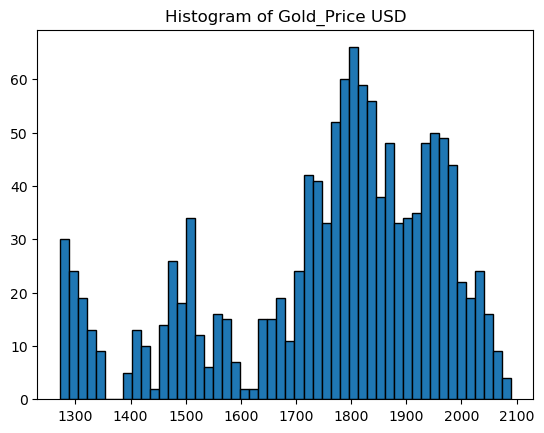

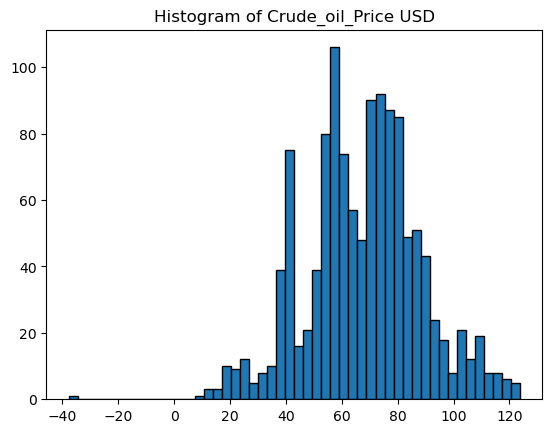

In [8]:
features = ['Gold_Price', 'Crude_oil_Price']
for feature in features:
    plt.hist(price_data[feature], bins=50, edgecolor='black')
    plt.title('Histogram of ' + feature + " USD")
    plt.show()

Gold price is spread between 1200 and 2100 USD. We have three peaks. However, the largest peak is at 1800 USD and we have more than half of the data between 1700 and 2100. We can expect that the majority of the years where there are no major world effects will have a price between 1700 and 2000 USD.
On the other hand, the distribution of Oil prices seems to be more normal where the majority of the data is between 50 to 100 USD. However, we have tall spikes of around 40 USD. We expect those spikes to be the price during COVID-19 where world demand for oil dropped significantly as a result of shutdowns across the globe. We should also mention that we have some points with around -40 USD price. More information about when oil prices dropped to less than 0 can be found [here](https://www.nytimes.com/2020/04/20/business/oil-prices.html).

### Visualizations of mean Gold and Oil price for per year (2019-2023)

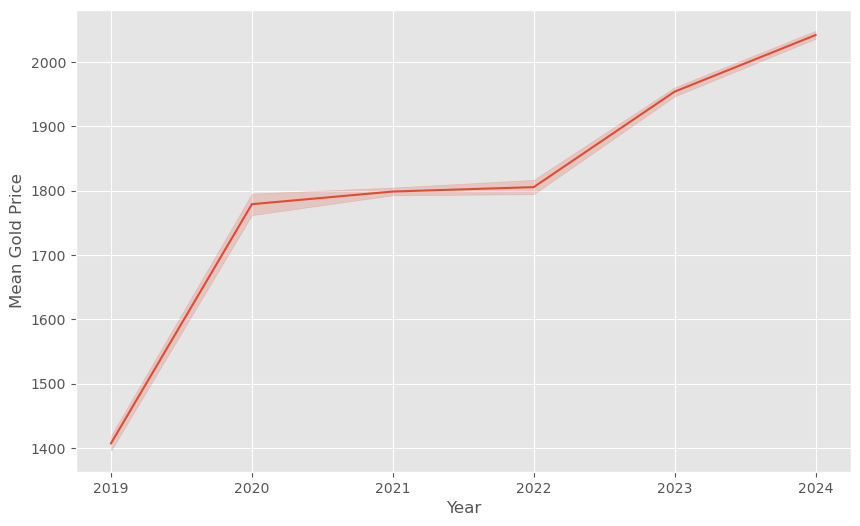

In [9]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.lineplot(data=price_data.sort_values(by="Year"), x='Year', y='Gold_Price')
plt.ylabel("Mean Gold Price");

Gold price seem to be increasing over the time period. However, in 2019, the price increased rapidly from around 1400 USD in the 2019 to less than 1800 USD in 2020. Then, gold price seem to have slightly increased from 2020 to 2022, but still around 1800 USD. In 2023, the priced to around 1950 USD, and increased to around 2200 in 2024 so far.

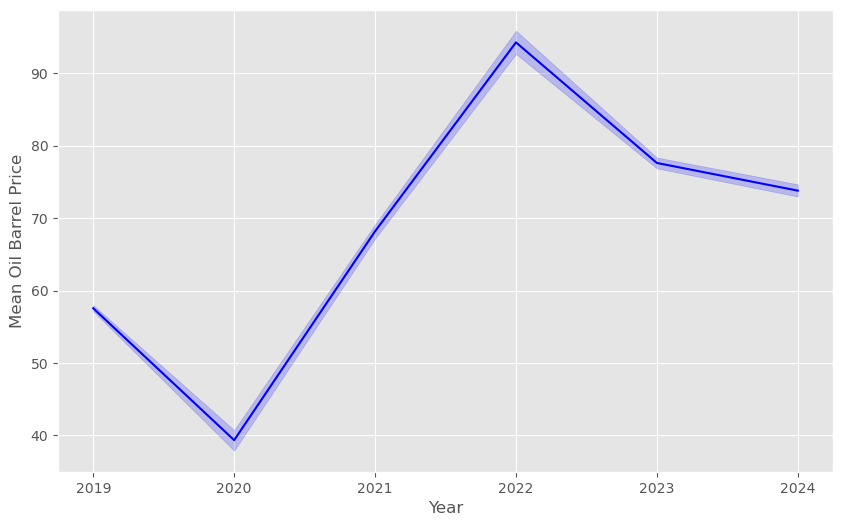

In [10]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.lineplot(data=price_data.sort_values(by="Year"), x='Year', y='Crude_oil_Price', color = "blue")
plt.ylabel("Mean Oil Barrel Price");

### Visualization of mean Gold and Oil Price per month across the years 2019-2023

In [11]:
groupby_month_year = price_data.groupby(by=['Year', 'Month'], as_index=True).mean(numeric_only=True)


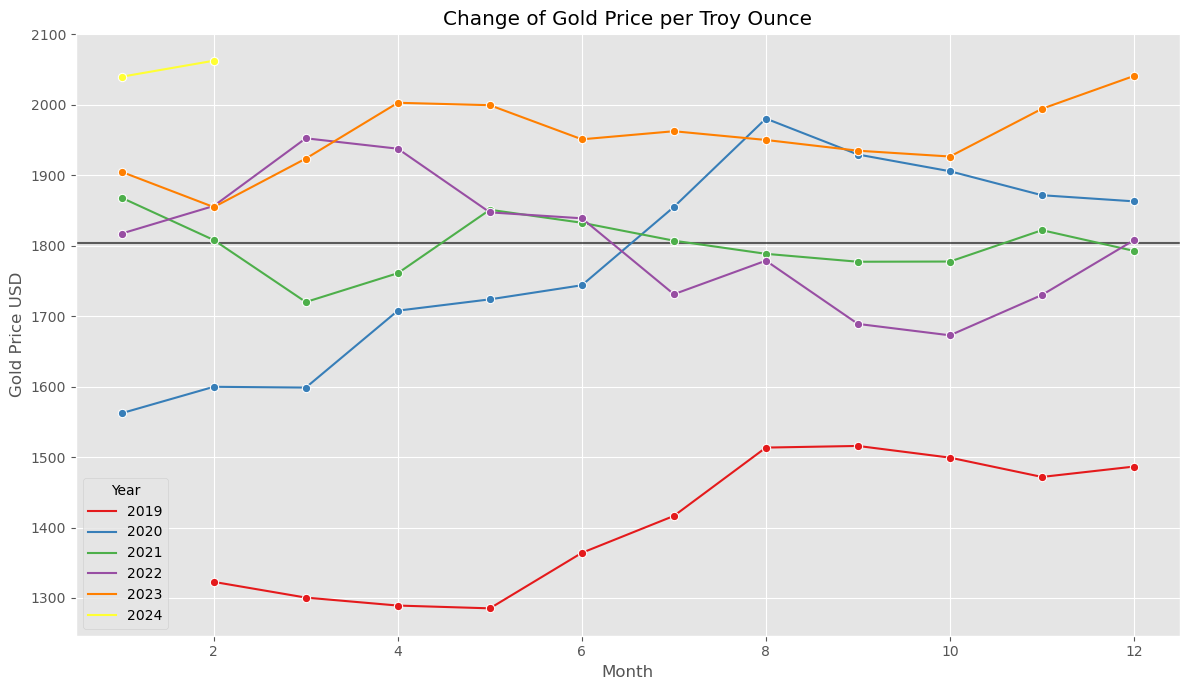

In [12]:
plt.figure(figsize=(12,7))
plt.hlines(y=price_data['Gold_Price'].median(), xmin=-1, xmax=13, color= "black", alpha =0.6)
sns.lineplot(data=groupby_month_year, x='Month', y='Gold_Price', hue = "Year", marker="o", palette="Set1")
plt.ylabel('Gold Price USD')
plt.xlim(0.5, 12.5)
plt.title("Change of Gold Price per Troy Ounce")
plt.tight_layout();


We can observe that gold price across months for different months is almost steady except for 2020 and 2022 where the price fluctuated up and down. This can be as a result of COVID-19 in 2020 and the Russian invasion of Ukraine in 2022.

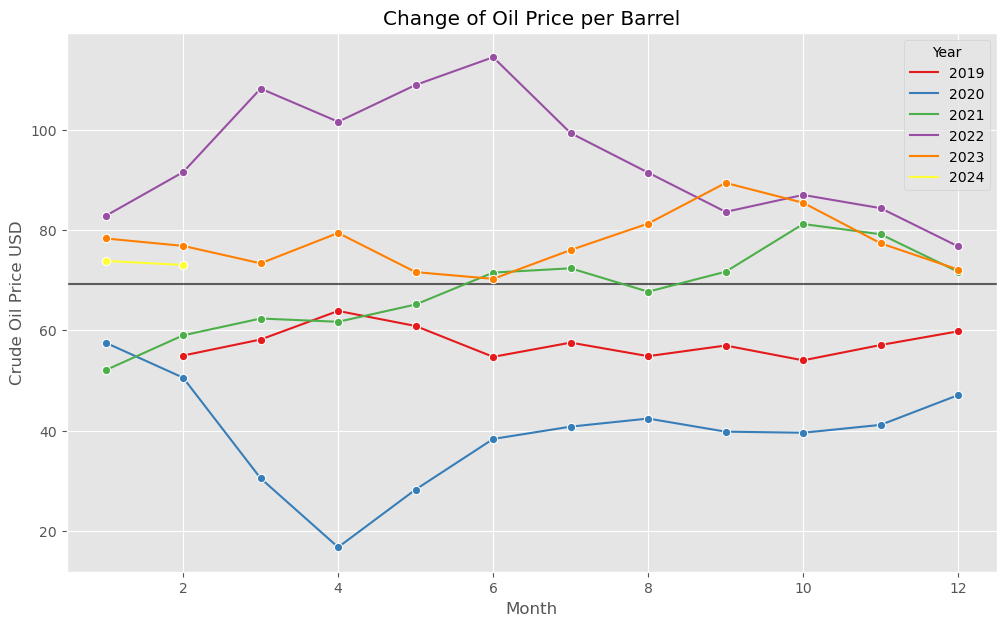

In [13]:
plt.figure(figsize=(12,7))
plt.hlines(y=price_data['Crude_oil_Price'].median(), xmin=0, xmax=13, color= "black", alpha =0.6)
sns.lineplot(data=groupby_month_year, x='Month', y='Crude_oil_Price', hue = "Year", marker="o", palette="Set1")
plt.ylabel('Gold Price USD')
plt.xlim(0.5, 12.5)
plt.ylabel('Crude Oil Price USD')
plt.title("Change of Oil Price per Barrel");

We observe that oil price is also steady across months for all years except 2020 and 2022. In 2020, oil price is at its lowest and it droped to less than 20 USD in April 2020. By the end of the year, the price started to recover and rose to its normal level. On the other hand, in 2022, oil price recorded its highest in this year where it exceeded 100 USD for March, April, May, and June. Then, the price went down to its normal levels.  
Again, those irregular patterns in oil price happened in the same years (2020 and 2021) that we saw irregular patterns for gold price. This also be because of COVID-19 and the Russian invasion of Ukraine. 

### An overall plot to show the trends using one line from 2019 to 2024

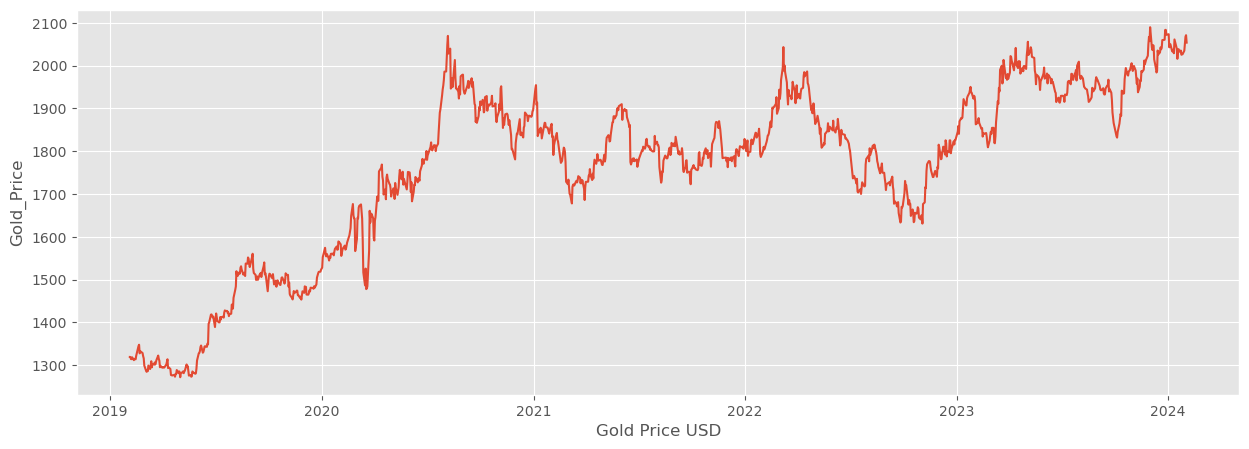

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(data=price_data, x='Date', y='Gold_Price')
plt.xlabel("Gold Price USD");

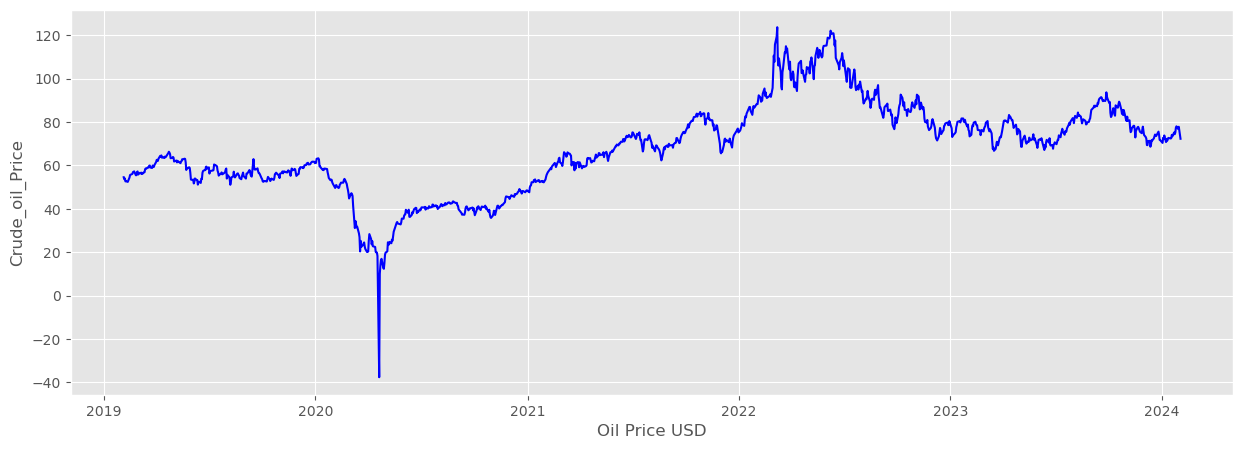

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(data=price_data, x='Date', y='Crude_oil_Price', color='blue')
plt.xlabel('Oil Price USD');